# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Now let's try some Kinetic Monte Carlo

We wish to implement a Kinetic Monte Carlo algorithm to simulate the same situation. See https://en.wikipedia.org/wiki/Kinetic_Monte_Carlo for details.

We'll assume the numbers of rabbits and foxes (starting at 400 and 200) are actual rabbits and foxes, not "rabbit densities" for example, and so must always remain integers: you can't have half a rabbit or half a fox.

There are four events, with rates that are straightforward to calculate, so the rejection-free algorithm is suitable:
* `rabbit_birth = k1 * rabbits`
* `rabbit_death = k2 * rabbits * foxes`
* `fox_birth = k3 * rabbits * foxes`
* `fox_death = k4 * foxes`


Use a Kinetic Monte Carlo simulation(s) running for 600 days to determine
1. The expected location of the second peak in foxes (eg. 425 days, 2800 foxes), on occasions that there is one (eg. if there's a peak that's  >200 days and >100 foxes)
2. The interquartile range of the second peak in foxes (eg. 411-443 days, 2700-3120 foxes).
3. The probability that the foxes die out before 600 days are complete

Make sure you've done enough simulations to be suitably confident in your answers (given the precision you think appropriate).

# Your turn!

In [18]:
# Paste library imports here so they don't have to be re-run all the time - OK admittedly that's not what I did
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import iqr as iqr
# Set constants
k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04

In [19]:
# Initialize model
t = 0
state = 0
rabbits = []
foxes = []
times = []
rabbits.append(400)
foxes.append(200)
times.append(t)
while t < 600: # Run the simulation until random time steps add up to 600 days
    # store the last values of rabbits and foxes locally
    r = rabbits[-1]
    f = foxes[-1]
    # Calculate rates
    rabbit_birth = k1 * r
    rabbit_death = k2 * r * f
    fox_birth = k3 * r * f
    fox_death = k4 * f
    total_rate = rabbit_birth + rabbit_death + fox_birth + fox_death
    # Calculate cumulative probabilities
    rabirth_index = rabbit_birth / total_rate
    radeath_index = rabirth_index + rabbit_death / total_rate
    foxbirth_index = radeath_index + fox_birth / total_rate
    # Set the new outcome
    state = np.random.uniform(0,1)         # Set state to random number from 0 to 1
    if state < foxbirth_index:          # If ouside fox death region (foxbirth_index < state < 1)
        if state < radeath_index:       # If outside fox birth region (radeath_index < state < foxbirth_index)
            if state >= rabirth_index:  # if inside rabbit death region (rabirth_index < state < radeath_index )
                rabbits.append(r - 1)   # Subtract 1 rabbit (rabbit death) and keep foxes same
                foxes.append(f)
            else:                       # Only remaining option here rabbit birth index
                rabbits.append(r + 1)   # Add 1 rabbit 
                foxes.append(f)         # and keep foxes same
        else:                           # If inside fox birth region (radeath_index <= state < foxbirth_index)
            rabbits.append(r)           # Keep rabbits same
            foxes.append(f+1)           # and add 1 fox
    else:                               # If inside fox death region (foxbirth_index < state < 1)
        rabbits.append(r)               # Keep rabbits same
        foxes.append(f-1)               # and subtract 1 fox (fox death)
    # Calculate time step
    t = times[-1]                       # Retrieve current time value
    times.append(t + math.log(1 / np.random.uniform(1,0)) / total_rate)  # Add new time value
    
    
# Algorithm:
# I. Initialize rabbits, foxes, times arrays DONE
#II. Write Do until loop for time to 600 days DONE
    # 1. Capture current rabbit and fox values DONE
    # 2. Calculate probabilities of the four events for current rabbit & fox values DONE
    # 3. Map probabilities into distribution from 0 - 1 DONE
        # i. sum rates DONE
        # ii. calculate rate[i]/sum for each rate DONE
        # iii. store additive ranges of each rate[i]/sum DONE
    # 4. Set new state DONE
        # i. generate random number DONE
        # ii. select state from ranges in 3 DONE
    # 5. Update outcome DONE
        # i. rabbit_birth --> append current rabbit value + 1 to rabbits etc. DONE
        # ii. for other value append current value DONE
    # 6. Generate random time step DONE
        # i. generate new random number u' DONE - merged with below
        # ii. time = time + ln(1/u') / sum of rates DONE
        

In [3]:
def KMC():
    # Initialize model
    t = 0
    state = 0
    rabbits = [400]
    foxes = [200]
    times = [t]
    while t < 600: # Run the simulation until random time steps add up to 600 days
        # store the last values of rabbits and foxes locally
        r = rabbits[-1]
        f = foxes[-1]
        # Throw in error checking to abort calculation if all rabbits are dead
        if r <= 0:
            break
        # Calculate rates
        rabbit_birth = k1 * r
        rabbit_death = k2 * r * f
        fox_birth = k3 * r * f
        fox_death = k4 * f
        total_rate = rabbit_birth + rabbit_death + fox_birth + fox_death
        # Calculate cumulative probabilities
        rabirth_index = rabbit_birth / total_rate
        radeath_index = rabirth_index + rabbit_death / total_rate
        foxbirth_index = radeath_index + fox_birth / total_rate
        # Set the new outcome
        state = np.random.uniform(0,1)      # Set state to random number from 0 to 1
        if state < foxbirth_index:          # If ouside fox death region (foxbirth_index < state < 1)
            if state < radeath_index:       # If outside fox birth region (radeath_index < state < foxbirth_index)
                if state >= rabirth_index:  # if inside rabbit death region (rabirth_index < state < radeath_index )
                    rabbits.append(r - 1)   # Subtract 1 rabbit (rabbit death) 
                    foxes.append(f)         # and keep foxes same
                else:                       # Only remaining option here rabbit birth index
                    rabbits.append(r + 1)   # Add 1 rabbit 
                    foxes.append(f)         # and keep foxes same
            else:                           # If inside fox birth region (radeath_index <= state < foxbirth_index)
                rabbits.append(r)           # Keep rabbits same
                foxes.append(f+1)           # and add 1 fox
        else:                               # If inside fox death region (foxbirth_index < state < 1)
            rabbits.append(r)               # Keep rabbits same
            foxes.append(f-1)               # and subtract 1 fox (fox death)
        # Calculate time step  
        t = times[-1] # Update current time value        
        times.append(t + math.log(1 / np.random.uniform(1,0)) / total_rate)  # Add new time value
    # Convert foxes and times to arrays for range handling
    fox_arr = np.array(foxes)
    time_arr = np.array(times)
    # Find 2nd peak range and return stats
    fox_subset = fox_arr*(fox_arr>100)*(time_arr > 200)     # From tips, find portion of foxes array after 300 days with more than 100 foxes
    return [times[np.argmax(fox_subset)],np.amax(fox_subset),foxes[-1]==0] # Return list of time of 2nd peak, value of 2nd peak, whether all foxes died

# Convergence test

In [4]:
# Set up output a la ODE solver
run_nums = []  # List to hold number of KMC iterations
ave_maxes = [] # List to hold average peak value
print("iterations      peak value")
# Iterate from 10 to 100 times in 10 run increments and store avearage max
for i in np.arange(9,109,10):
    run_nums.append(i+1) # Record number of iterations in this run
    maxes= [KMC()[1]] # List to store maxes in one set of runs before averaging
    for j in range(i):
        maxes.append(KMC()[1]) # Adds a new KMC max to maxes
    maxarr = np.array(maxes)   # Converts maxes list to array for average calculation
    ave_max = np.average(maxarr[maxarr > 0]) # Calculate average of peaks (where peaks occur)
    ave_maxes.append(ave_max) # Adds the average of maxes to ave_maxes
    print("{0:2d}      {1:8.3g}".format(i+1, ave_max))

iterations      peak value
10      2.49e+03
20      2.27e+03
30      2.01e+03
40      2.46e+03
50      2.57e+03
60      2.19e+03
70      2.62e+03
80      2.38e+03
90      2.35e+03
100      2.43e+03


Well that didn't work. Let's try with more iterations and see if a tighter interval is possible

In [7]:
# Set up output a la ODE solver
run_nums = []  # List to hold number of KMC iterations
ave_maxes = [] # List to hold average peak value
print("iterations      peak value")
# Iterate from 100 to 150 times in 10 run increments and store avearage max
for i in np.arange(9,199,10):
    run_nums.append(i+1) # Record number of iterations in this run
    maxes= [KMC()[1]] # List to store maxes in one set of runs before averaging
    for j in range(i):
        maxes.append(KMC()[1]) # Adds a new KMC max to maxes
    maxarr = np.array(maxes)   # Converts maxes list to array for average calculation
    ave_max = np.average(maxarr[maxarr > 0]) # Calculate average of peaks (where peaks occur)
    ave_maxes.append(ave_max) # Adds the average of maxes to ave_maxes
    print("{0:2d}            {1:5.1f}".format(i+1, ave_max))

iterations      peak value
10            2304.4
20            2381.1
30            2050.1
40            2337.1
50            2197.5
60            2397.2
70            2237.5
80            2306.5
90            2277.0
100            2442.8
110            2367.4
120            2403.7
130            2375.6
140            2309.5
150            2380.0
160            2334.2
170            2311.6
180            2377.9
190            2323.8


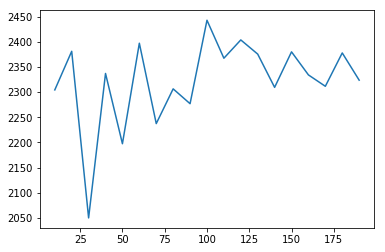

In [8]:
plt.plot(run_nums, ave_maxes)

# Analysis

In [23]:
# Based on the above, a run of 170 iterations looks like a good sample size
iterations = 175
# Initialize arrays to hold KMC data
peak_times = np.zeros(iterations)
peak_sizes = np.zeros(iterations)
extinctions  = np.zeros(iterations)
# Store KMC data in arrays
for i in range(iterations):
    peak_times[i], peak_sizes[i], extinctions[i] = KMC()
# Find average time and peak size for runs that have a second peak
sp_times = peak_times[peak_sizes > 0]
sp_sizes = peak_sizes[peak_sizes > 0]
mean_time = np.average(sp_times)
mean_size = np.average(sp_sizes)
# Find IQR for times and peak sizes for runs that have a second peak
time_iqr = iqr(sp_times)
size_iqr = iqr(sp_sizes)
# Find probability of foxes dying before 600 days are over
p_fox_death = sum(extinctions) / iterations
# Display results woooo!
print("The average second peak location is {0:5.1f} days at {1:5.1f} foxes".format(mean_time,mean_size))
print("The interquartile range is {0:5.1f} - {1:5.1f} days and {2:5.1f} - {3:5.1f} foxes".format(mean_time - time_iqr, mean_time + time_iqr, mean_size - size_iqr, mean_size + size_iqr))
print("The proportion of simulations in which foxes died out by day 600 is {0:1.3f}".format(p_fox_death))

The average second peak location is 400.2 days at 2460.4 foxes
The interquartile range is 367.0 - 433.4 days and 1701.6 - 3219.1 foxes
The proportion of simulations in which foxes died out by day 600 is 0.669
